In [1]:
import os
import matplotlib.pyplot as plt
from nilearn import image as img
from nilearn import plotting as plot
from bids import BIDSLayout

%matplotlib inline

Matplotlib is building the font cache; this may take a moment.


In [3]:
#pull files for 1 subject
fmriprep_dir = '/Volumes/Seagate_Desktop_Drive/MFC_fMRIPREP/derivatives/fmriprep/'
layout = BIDSLayout(fmriprep_dir, validate=False)
T1w_files = layout.get(subject='mfcc003', datatype='anat', suffix='T1w',extension='.nii.gz',space='MNI152NLin2009cAsym')
brainmask_files = layout.get(subject='mfcc003', datatype='anat',suffix='mask',extension='.nii.gz',space='MNI152NLin2009cAsym')

In [4]:
#display files inside anat folder
for f in T1w_files:
    print(f.path)

/Volumes/Seagate_Desktop_Drive/MFC_fMRIPREP/derivatives/fmriprep/sub-mfcc003/anat/sub-mfcc003_space-MNI152NLin2009cAsym_desc-preproc_T1w.nii.gz


In [5]:
#ref files inside imgs object
t1 = T1w_files[0].path
bm = brainmask_files[0].path

t1_img = img.load_img(t1)
bm_img = img.load_img(bm)

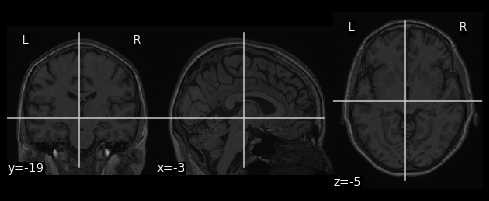

In [6]:
#plot
plot.plot_anat(t1_img)

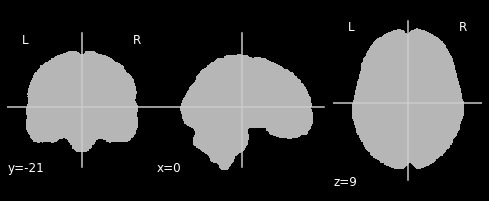

In [7]:
plot.plot_anat(bm_img)

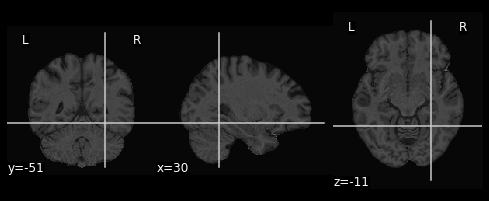

In [10]:
#apply mask by multiplication

masked_t1 = img.math_img('a*b', a=t1, b=bm)
plot.plot_anat(masked_t1)

In [12]:
#slicing

x_slice = t1_img.slicer[10:11,:,:]

#or
# t1_data = t1_img.get_data()
# x_slice = t1_data[10,:,:]

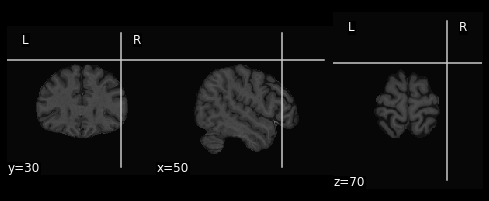

In [14]:
#plot specific slice

plot.plot_anat(masked_t1, cut_coords=(50,30,70))